In [1]:
import gensim
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report
from nltk.corpus import stopwords
from nltk import ngrams
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
import re

In [2]:
df=pd.read_csv(r"D:\PGCP-DSML RITHEESH V\NLP\TA&NLP-Assignment 2\emails.csv")

In [3]:
df

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,Email 5168,2,2,2,3,0,0,32,0,0,...,0,0,0,0,0,0,0,0,0,0
5168,Email 5169,35,27,11,2,6,5,151,4,3,...,0,0,0,0,0,0,0,1,0,0
5169,Email 5170,0,0,1,1,0,0,11,0,0,...,0,0,0,0,0,0,0,0,0,1
5170,Email 5171,2,7,1,0,2,1,28,2,0,...,0,0,0,0,0,0,0,1,0,1


In [4]:
df.shape

(5172, 3002)

In [5]:
df.isnull().sum()

Email No.     0
the           0
to            0
ect           0
and           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3002, dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df['Prediction'].value_counts()

Prediction
0    3672
1    1500
Name: count, dtype: int64

In [8]:
X = df.iloc[:,1:3001]
X

,the,to,ect,and,for,of,a,you,hou,in,...,enhancements,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry
0,0,0,1,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,13,24,6,6,2,102,1,27,18,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,0,0,0,8,0,0,4,...,0,0,0,0,0,0,0,0,0,0
3,0,5,22,0,5,1,51,2,10,1,...,0,0,0,0,0,0,0,0,0,0
4,7,6,17,1,5,2,57,0,9,3,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,2,2,2,3,0,0,32,0,0,5,...,0,0,0,0,0,0,0,0,0,0
5168,35,27,11,2,6,5,151,4,3,23,...,0,0,0,0,0,0,0,0,1,0
5169,0,0,1,1,0,0,11,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5170,2,7,1,0,2,1,28,2,0,8,...,0,0,0,0,0,0,0,0,1,0


In [9]:
Y = df.iloc[:,-1].values
Y

array([0, 0, 0, ..., 1, 1, 0], dtype=int64)

In [10]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2,random_state=45)

In [11]:
x_train.shape

(4137, 3000)

In [12]:
y_train.shape

(4137,)

# Naive Bayes Algorithm(Classifier)

In [13]:
mnb = MultinomialNB(alpha=1.9)         
mnb.fit(x_train,y_train)
y_pred1 = mnb.predict(x_test)
print("Accuracy Score for Naive Bayes : ", accuracy_score(y_pred1,y_test))

Accuracy Score for Naive Bayes :  0.9516908212560387


In [14]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       758
           1       0.88      0.94      0.91       277

    accuracy                           0.95      1035
   macro avg       0.93      0.95      0.94      1035
weighted avg       0.95      0.95      0.95      1035



# Random Forest Classifier

In [15]:
rfc = RandomForestClassifier(n_estimators=100,criterion='gini')
rfc.fit(x_train,y_train)
y_pred2 = rfc.predict(x_test)
print("Accuracy Score of Random Forest Classifier : ", accuracy_score(y_pred2,y_test))

Accuracy Score of Random Forest Classifier :  0.9768115942028985


In [16]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       758
           1       0.95      0.96      0.96       277

    accuracy                           0.98      1035
   macro avg       0.97      0.97      0.97      1035
weighted avg       0.98      0.98      0.98      1035



**Random Forest Classifier** is giving the best accuracy : **97%**

# K-means model for clustering

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from nltk.tokenize import RegexpTokenizer

In [18]:
tokenizer = RegexpTokenizer(r'\w+')

tf_idf_vect = TfidfVectorizer(lowercase=True,
                        stop_words='english',
                        ngram_range=(1,2), 
                        tokenizer=tokenizer.tokenize)

count_vect = CountVectorizer(lowercase=True,
                        stop_words='english',
                        ngram_range=(1,2),
                        tokenizer=tokenizer.tokenize)

x_train_tf = tf_idf_vect.fit_transform(x_train)
x_train_cv = count_vect.fit_transform(x_train)

print(x_train_tf.shape)
print(x_train_cv.shape)

(3000, 2762)
(3000, 2762)


- 2762 features are there we need to reduce the dimension use PCA

In [19]:
from sklearn.decomposition import PCA
import numpy as np

In [20]:
pca = PCA()
x_train_pca = pca.fit_transform(np.asarray(x_train_cv.todense()))
print(sum(np.cumsum(pca.explained_variance_ratio_)<0.9))

2484


In [21]:
len(np.cumsum(pca.explained_variance_ratio_))

2762

2762 is our dataset

In [22]:
pca = PCA(n_components=590)
x_train_pca = pca.fit_transform(np.asarray(x_train_tf.todense()))

In [23]:
x_train_pca.shape

(3000, 590)

stores this 590 in x_train_pca

In [24]:
tf_idf_vect.get_feature_names_out()

array(['abdv', 'ability', 'able', ..., 'zivley', 'zone', 'zonedubai'],
      dtype=object)

After reducing the dimension this feature names is not important

In [25]:
X = x_train_pca

import numpy as np
from sklearn.cluster import KMeans
from sklearn import metrics
Sum_of_squared_distances = []
silhouette_scores = []
K = range(2,15)
for k in K:
    print(k)
    kmeans = KMeans(n_clusters=k,init='k-means++').fit(X)
    pred_labels = kmeans.labels_
    Sum_of_squared_distances.append(kmeans.inertia_) 
    from sklearn import metrics
    ss = metrics.silhouette_score(X, pred_labels, metric='euclidean')
    silhouette_scores.append(ss)

In [26]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn import metrics
Sum_of_squared_distances = []
silhouette_scores = []
K = range(2, 15)

for k in K:
    print(k)
    kmeans = KMeans(n_clusters=k, init='k-means++').fit(X)
    pred_labels = kmeans.labels_
    Sum_of_squared_distances.append(kmeans.inertia_)
    ss = metrics.silhouette_score(X, pred_labels, metric='euclidean')
    silhouette_scores.append(ss)

2


E:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=12.
  warnings.warn(


3


E:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=12.
  warnings.warn(


4


E:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=12.
  warnings.warn(


5


E:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=12.
  warnings.warn(


6


E:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=12.
  warnings.warn(


7


E:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=12.
  warnings.warn(


8


E:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=12.
  warnings.warn(


9


E:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=12.
  warnings.warn(


10


E:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=12.
  warnings.warn(


11


E:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=12.
  warnings.warn(


12


E:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=12.
  warnings.warn(


13


E:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=12.
  warnings.warn(


14


E:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=12.
  warnings.warn(


- Inertia wil say how closely the clusters are
- Silhouette score will say how closely along how they are separated

### Use any of these to identify the cluster belongs -- provide more no. of clusters
- Elbow
- Silhouette
- Word cloud

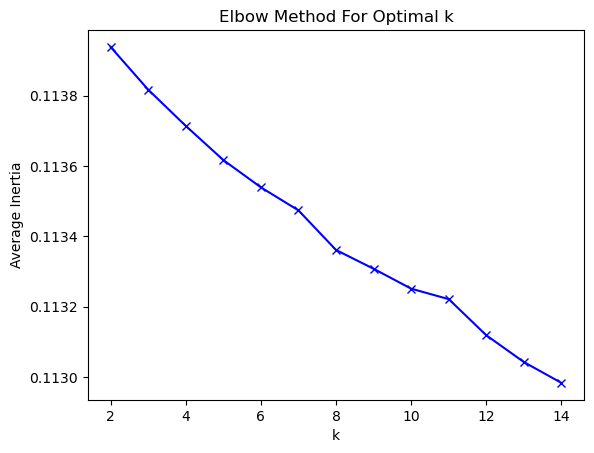

In [27]:
avg_inertia = [i/df.shape[0] for i in Sum_of_squared_distances]

import matplotlib.pyplot as plt

plt.plot(K, avg_inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('Average Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

- Here our situation is not ideal as we cannot see very clear elbow
- We cannot conclude any optimal number of k.

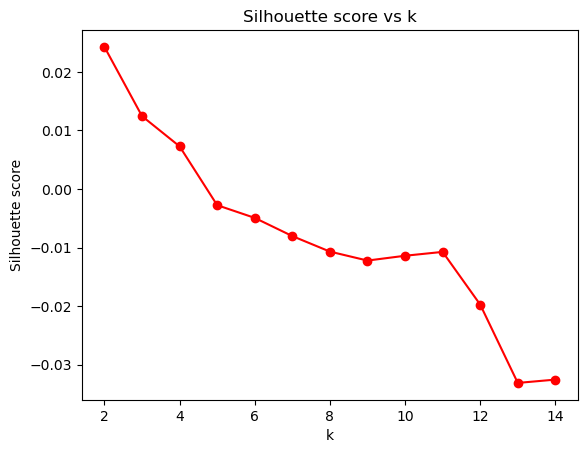

In [28]:
plt.plot(K,silhouette_scores,'ro-')
plt.xlabel('k')
plt.ylabel('Silhouette score')
plt.title('Silhouette score vs k')
plt.show()

In [29]:
kmeans = KMeans(n_clusters=10,init='k-means++').fit(X)
pred_labels = kmeans.labels_

E:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=12.
  warnings.warn(


In [30]:
from sklearn import metrics
ss= metrics.silhouette_score(X,pred_labels,metric='euclidean')
print("Silhouette score: ",ss)

Silhouette score:  -0.02331392961250345


- Here silhouette score is 0.013748366799237379 that is clusters are getting very close.

# Latent Semantic Analysis(LSA) Model

In [31]:
import nltk
from nltk.corpus import stopwords
stop=stopwords.words('english')+['said','u','v','s','t']

### TF-IDF Feature Generation

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')

tf_idf_vect = TfidfVectorizer(lowercase=True,
                        stop_words=stop,
                        ngram_range = (1,2),
                        tokenizer = tokenizer.tokenize)

count_vect = CountVectorizer(lowercase=True,
                        stop_words=stop,
                        ngram_range = (1,2),
                        tokenizer = tokenizer.tokenize)

X_train_tf = tf_idf_vect.fit_transform(x_train)
X_train_cv = count_vect.fit_transform(x_train)

X_train_tf.shape
X_train_cv.shape

(3000, 2863)

In [33]:
from sklearn.decomposition import TruncatedSVD
number_of_topics = 2
svd_model = TruncatedSVD(n_components=number_of_topics, n_iter=100, random_state=23)
svd_model.fit(X_train_tf)

TruncatedSVD(n_iter=100, random_state=23)

In [34]:
X_transformed = svd_model.transform(X_train_tf)
U = X_transformed / svd_model.singular_values_
Sigma_matrix = np.diag(svd_model.singular_values_)
VT = svd_model.components_

In [35]:
terms = tf_idf_vect.get_feature_names_out()

for i, comp in enumerate(VT):
    terms_comp = zip(terms, comp)
    sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:10]
    print("\nTopic "+str(i)+": ")
    for t in sorted_terms:
        print(t[0])


Topic 0: 
put
either
monitor
line
forms
zone
review
filter
talking
bed

Topic 1: 
dating
tess
origination
bank
search
allowing
charge
high
mobil
advice


- Topic 0 and Topic 1 belongs to **email no.**

In [36]:
VT[0]

array([ 0.03154094, -0.00685789,  0.00440015, ...,  0.02213781,
        0.05681626,  0.00739127])

In [37]:
tf_idf_vect.get_feature_names_out()

array(['abdv', 'ability', 'able', ..., 'zivley', 'zone', 'zonedubai'],
      dtype=object)

In [38]:
sorted(list(zip(tf_idf_vect.get_feature_names_out()[:10],VT[0][0:10])), key=lambda x:x[1], reverse=True)

[('abdv', 0.03154093901499869),
 ('according', 0.02640436883460574),
 ('accepted', 0.012399367002456765),
 ('able', 0.0044001459395457306),
 ('access', -0.001446143116026421),
 ('acceptance', -0.00432834537660607),
 ('ac', -0.0055256686867057765),
 ('ability', -0.006857886231246723),
 ('accept', -0.012992808024071009),
 ('account', -0.03505841113279301)]

In [39]:
Sigma_matrix

array([[1., 0.],
       [0., 1.]])

In [40]:
svd_model.singular_values_

array([1., 1.])

In [41]:
VT.shape

(2, 2863)

- We extracted the hidden layers of the corpus and found the similar meaning words.

### Latent Dirichlet Allocation (LDA)

In [42]:
import gensim
from nltk.corpus import stopwords
from nltk import ngrams
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
import re
import string 
from gensim.models.coherencemodel import CoherenceModel

In [43]:
corpus = df.text

In [44]:
stop = set(stopwords.words('english'))
stop.update(set(['s','said','will','year','new','u','v']))

In [45]:
punc = set(string.punctuation)

In [46]:
lemmatizer = WordNetLemmatizer()
def preprocess(text):
    normalized = [lemmatizer.lemmatize(df) for df in df]
    return normalized

In [47]:
cleaned_corpus = [preprocess(text) for text in corpus]

In [48]:
corpus[0]

0

In [49]:
cleaned_corpus[0]

['Email No.',
 'the',
 'to',
 'ect',
 'and',
 'for',
 'of',
 'a',
 'you',
 'hou',
 'in',
 'on',
 'is',
 'this',
 'enron',
 'i',
 'be',
 'that',
 'will',
 'have',
 'with',
 'your',
 'at',
 'we',
 's',
 'are',
 'it',
 'by',
 'com',
 'a',
 'from',
 'gas',
 'or',
 'not',
 'me',
 'deal',
 'if',
 'meter',
 'hpl',
 'please',
 're',
 'e',
 'any',
 'our',
 'corp',
 'can',
 'd',
 'all',
 'ha',
 'wa',
 'know',
 'need',
 'an',
 'forwarded',
 'new',
 't',
 'may',
 'up',
 'j',
 'mmbtu',
 'should',
 'do',
 'am',
 'get',
 'out',
 'see',
 'no',
 'there',
 'price',
 'daren',
 'but',
 'been',
 'company',
 'l',
 'these',
 'let',
 'so',
 'would',
 'm',
 'into',
 'xl',
 'farmer',
 'attached',
 'u',
 'information',
 'they',
 'message',
 'day',
 'time',
 'my',
 'one',
 'what',
 'only',
 'http',
 'th',
 'volume',
 'mail',
 'contract',
 'which',
 'month',
 'more',
 'robert',
 'sitara',
 'about',
 'texas',
 'nom',
 'energy',
 'pec',
 'question',
 'www',
 'deal',
 'volume',
 'pm',
 'ena',
 'now',
 'their',
 'file

In [50]:
from gensim import corpora
d = corpora.Dictionary(cleaned_corpus)
d.token2id

{'Email No.': 0,
 'Prediction': 1,
 'a': 2,
 'abdv': 3,
 'ability': 4,
 'able': 5,
 'about': 6,
 'above': 7,
 'ac': 8,
 'accept': 9,
 'acceptance': 10,
 'accepted': 11,
 'access': 12,
 'according': 13,
 'account': 14,
 'accountant': 15,
 'accounting': 16,
 'accuracy': 17,
 'accurate': 18,
 'achieve': 19,
 'acquire': 20,
 'acquisition': 21,
 'across': 22,
 'act': 23,
 'action': 24,
 'active': 25,
 'activity': 26,
 'acton': 27,
 'actual': 28,
 'actually': 29,
 'actuals': 30,
 'ad': 31,
 'add': 32,
 'added': 33,
 'adding': 34,
 'addition': 35,
 'additional': 36,
 'additionally': 37,
 'address': 38,
 'addressed': 39,
 'adjust': 40,
 'adjusted': 41,
 'adjustment': 42,
 'administration': 43,
 'adobe': 44,
 'adonis': 45,
 'adult': 46,
 'advance': 47,
 'advanced': 48,
 'advantage': 49,
 'advertisement': 50,
 'advice': 51,
 'advise': 52,
 'advised': 53,
 'advises': 54,
 'advisor': 55,
 'aeor': 56,
 'aep': 57,
 'aepin': 58,
 'affect': 59,
 'affected': 60,
 'affiliate': 61,
 'affordable': 62,
 'a

In [51]:
d.doc2bow(['ability','ability'])

[(4, 2)]

In [52]:
print(d)

Dictionary<2729 unique tokens: ['Email No.', 'Prediction', 'a', 'abdv', 'ability']...>


In [53]:
doc_term_matrix = [d.doc2bow(i) for i in cleaned_corpus]

In [54]:
Lda = gensim.models.ldamodel.LdaModel

In [55]:
lda_model = Lda(doc_term_matrix,num_topics=2,id2word=d,passes=2,random_state=0)

## Higher the coherence score better the topic model
- Computing the Coherence Score

In [56]:
coherence_model_lda = CoherenceModel(model=lda_model, texts=cleaned_corpus, dictionary=d, coherence='c_v')

In [57]:
coherence_lda = coherence_model_lda.get_coherence()

In [58]:
print('Coherence Score: ', coherence_lda)

Coherence Score:  0.5993474623957178


In [59]:
lda_model.print_topics()

[(0,
  '0.001*"hour" + 0.001*"entry" + 0.001*"payment" + 0.001*"tax" + 0.001*"m" + 0.001*"provider" + 0.001*"stock" + 0.001*"term" + 0.001*"mail" + 0.001*"head"'),
 (1,
  '0.001*"process" + 0.001*"give" + 0.001*"lot" + 0.001*"place" + 0.001*"investor" + 0.001*"cd" + 0.001*"well" + 0.001*"activity" + 0.001*"ce" + 0.001*"way"')]

- **payment and entry** are very close

In [60]:
import pyLDAvis
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
p = pyLDAvis.gensim.prepare(lda_model, doc_term_matrix, d)

In [61]:
p

PreparedData(topic_coordinates=             x    y  topics  cluster       Freq
topic                                          
1      0.00319  0.0       1        1  50.028039
0     -0.00319  0.0       2        1  49.971961, topic_info=         Term          Freq         Total Category  logprob  loglift
1160     hour  10336.000000  10336.000000  Default  30.0000  30.0000
2047  remains   5177.000000   5177.000000  Default  29.0000  29.0000
810     entry  10336.000000  10336.000000  Default  28.0000  28.0000
1800  payment  10337.000000  10337.000000  Default  27.0000  27.0000
2391      tax  10337.000000  10337.000000  Default  26.0000  26.0000
...       ...           ...           ...      ...      ...      ...
1523     mean   5905.357162  10340.706317   Topic2  -7.1807   0.1335
2527        u   5885.109562  10340.850209   Topic2  -7.1842   0.1300
1371     last   5881.543098  10340.875914   Topic2  -7.1848   0.1294
1530   medium   5841.364035  10341.075631   Topic2  -7.1916   0.1225
1532  meeting   5838.815528  10341.105167   Topic2  -7.1921   0.1221

[146 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
14        1  0.425894     account
14        2  0.574145     account
26        1  0.594597    activity
26        2  0.405416    activity
42        1  0.573501  adjustment
...     ...       ...         ...
2642      2  0.403479        well
2692      1  0.627387       world
2692      2  0.372529       world
2697      1  0.638555       write
2697      2  0.361494       write

[232 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1])